Combined lab and homework assignment on sound and audio files: Part 1
If you using your own computer please install the library "simpleaudio"

The following commands will test whether the audio file can be played back on your computer. Before you
execute them, a word of caution:

1) Plug in your headset and set the volume control to a minimum.

2) Hold it away from your ears and execute the following cell to play back the 35 second audio file.

3) As the song is playing bring the head phone closer to yor ears and increase the volume gradually. Your
should hear a very short piece from Mussorgsky's "Pictures of an Exhibition".

In [127]:
!git clone https://github.com/AllenDowney/ThinkDSP.git 

fatal: destination path 'ThinkDSP' already exists and is not an empty directory.


In [128]:
# This file shows how to generate a sine wave using the ThinkDSP library.
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython


IPython.display.Audio('Promenade_very_short_mono.wav') # This is required on Google Colab due to compatibility issues

Combined lab and homework assignment on sound and audio files: Part 2

Execute the following commands at the beginning of for this and all following parts.

In [129]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
from scipy.io import wavfile
def PrintArrayInfo(a,name=''):
    if (len(name)==0):
        print("Array info:")
    else:
        print("Array:", name)
        print("shape:", a.shape)
        print("dtype:", a.dtype)
        print("min, max:", a.min(), a.max())
        print()

In [130]:
filename = 'audio_file_A_26408355.wav'
IPython.display.Audio(filename)

Load and plot the audio information:

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (44100,)
dtype: int16
min, max: -32767 32767



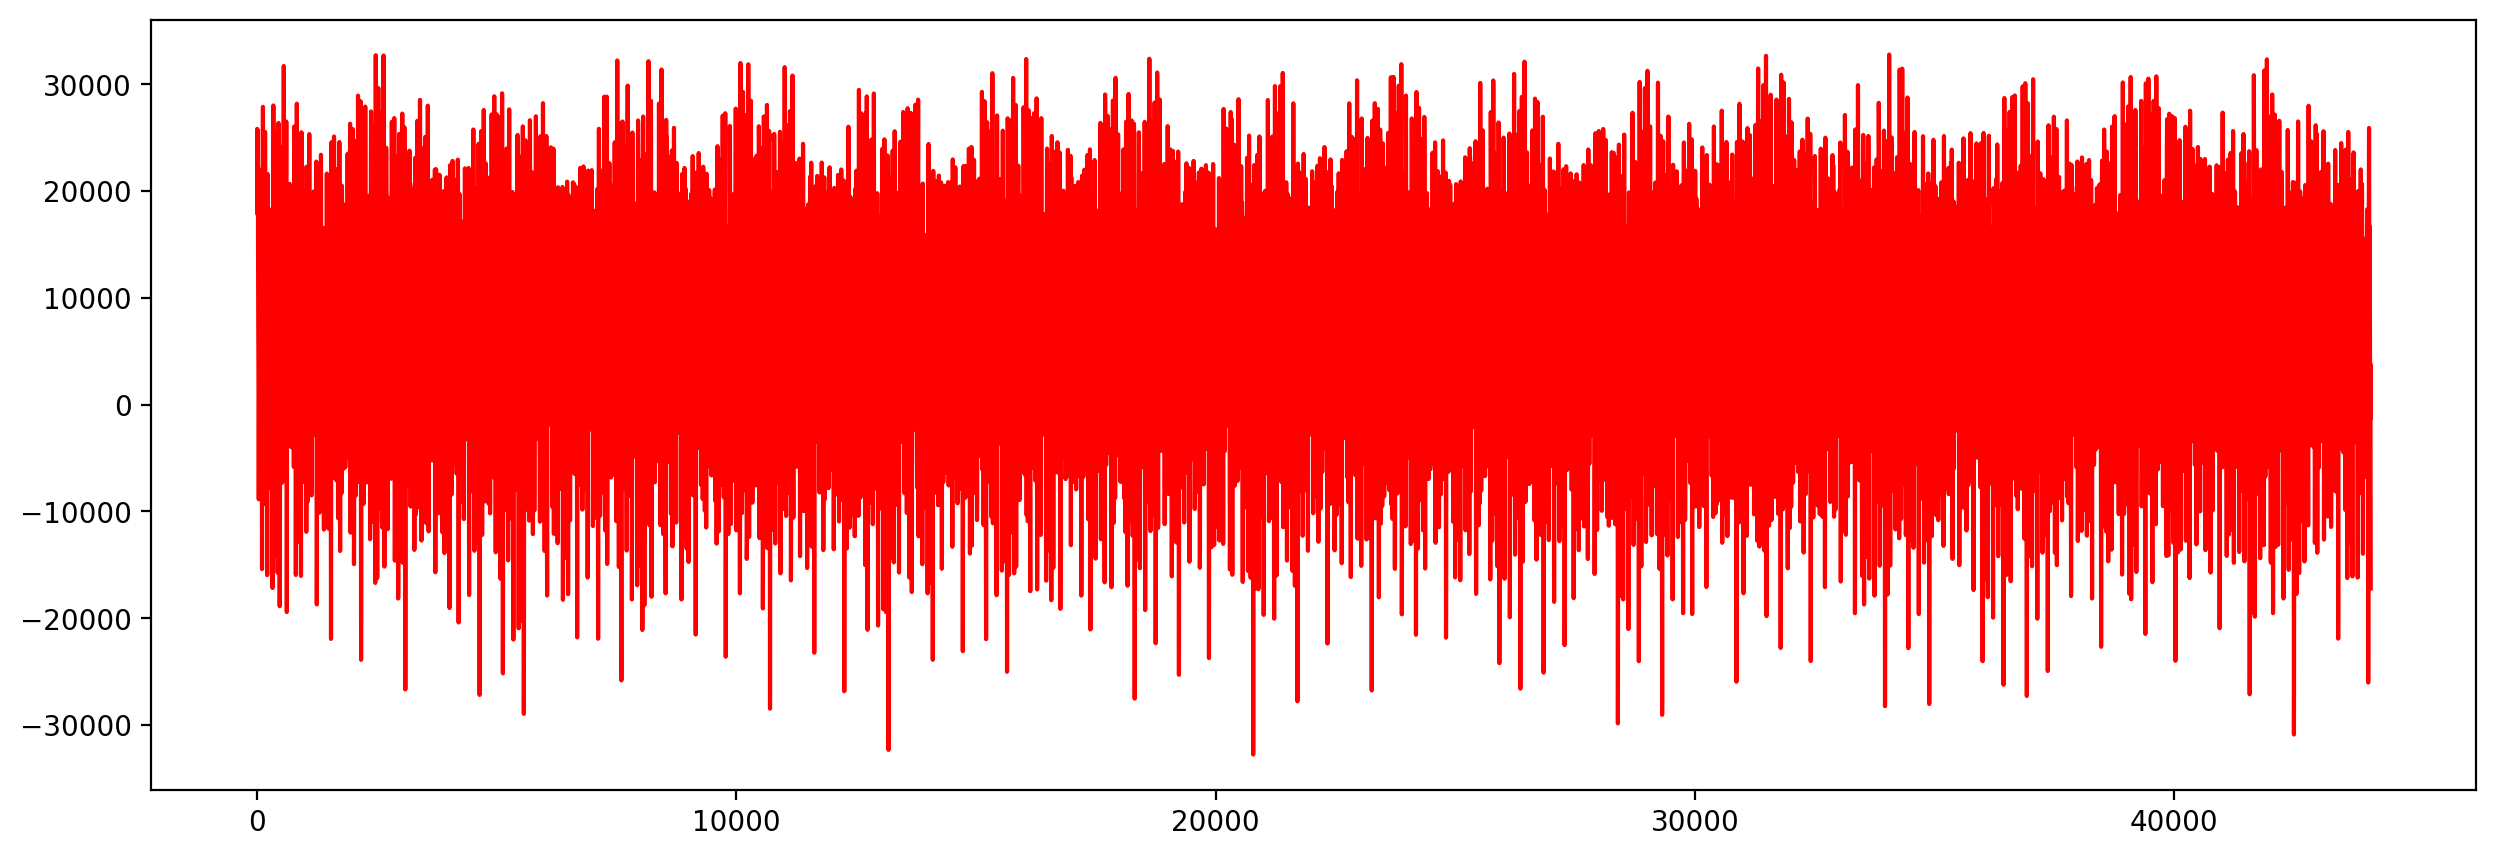

In [131]:
rate, data = wavfile.read(filename)
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data,'r-')
plt.show()

Zoom in and plot only the first 5000 data points.

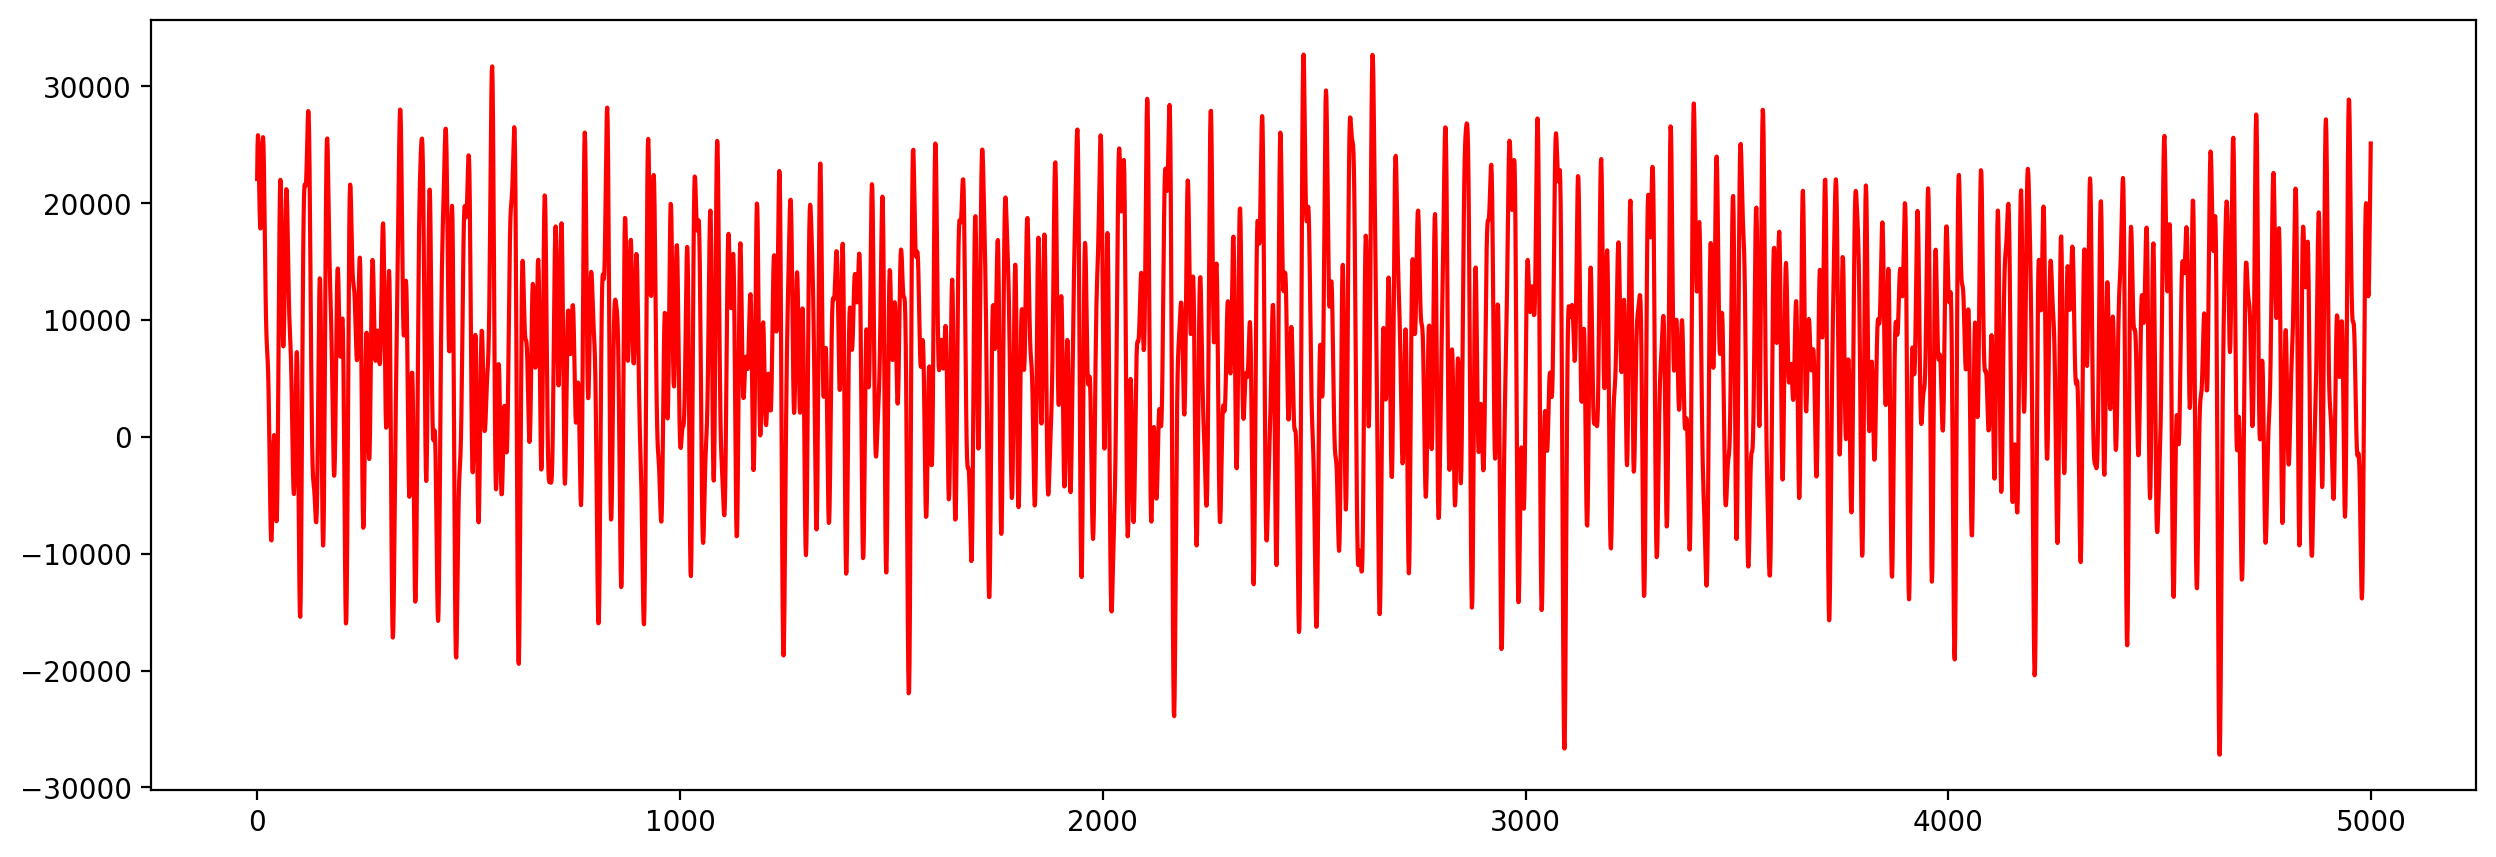

In [132]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data[:5000],'r-')
plt.show()

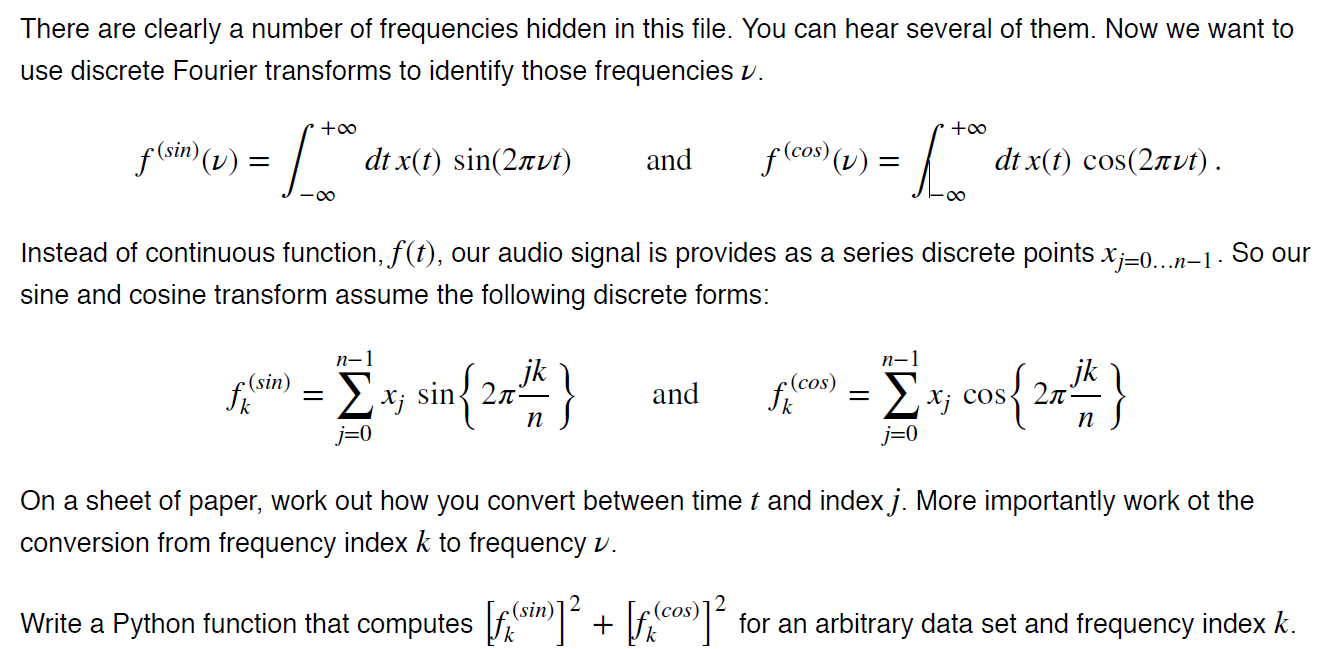

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def fk(k, data):
    sin_val = 0
    cos_val = 0
    for j in range(len(data)):
        sin_val += data[j] * np.sin(2*np.pi*j*k/len(data))
        cos_val += data[j] * np.cos(2*np.pi*j*k/len(data))
    return sin_val **2 + cos_val**2

Construct a array of frequency indicies from 200 and 300 and call this function for every single one. Plot the
result as function of frequency index.

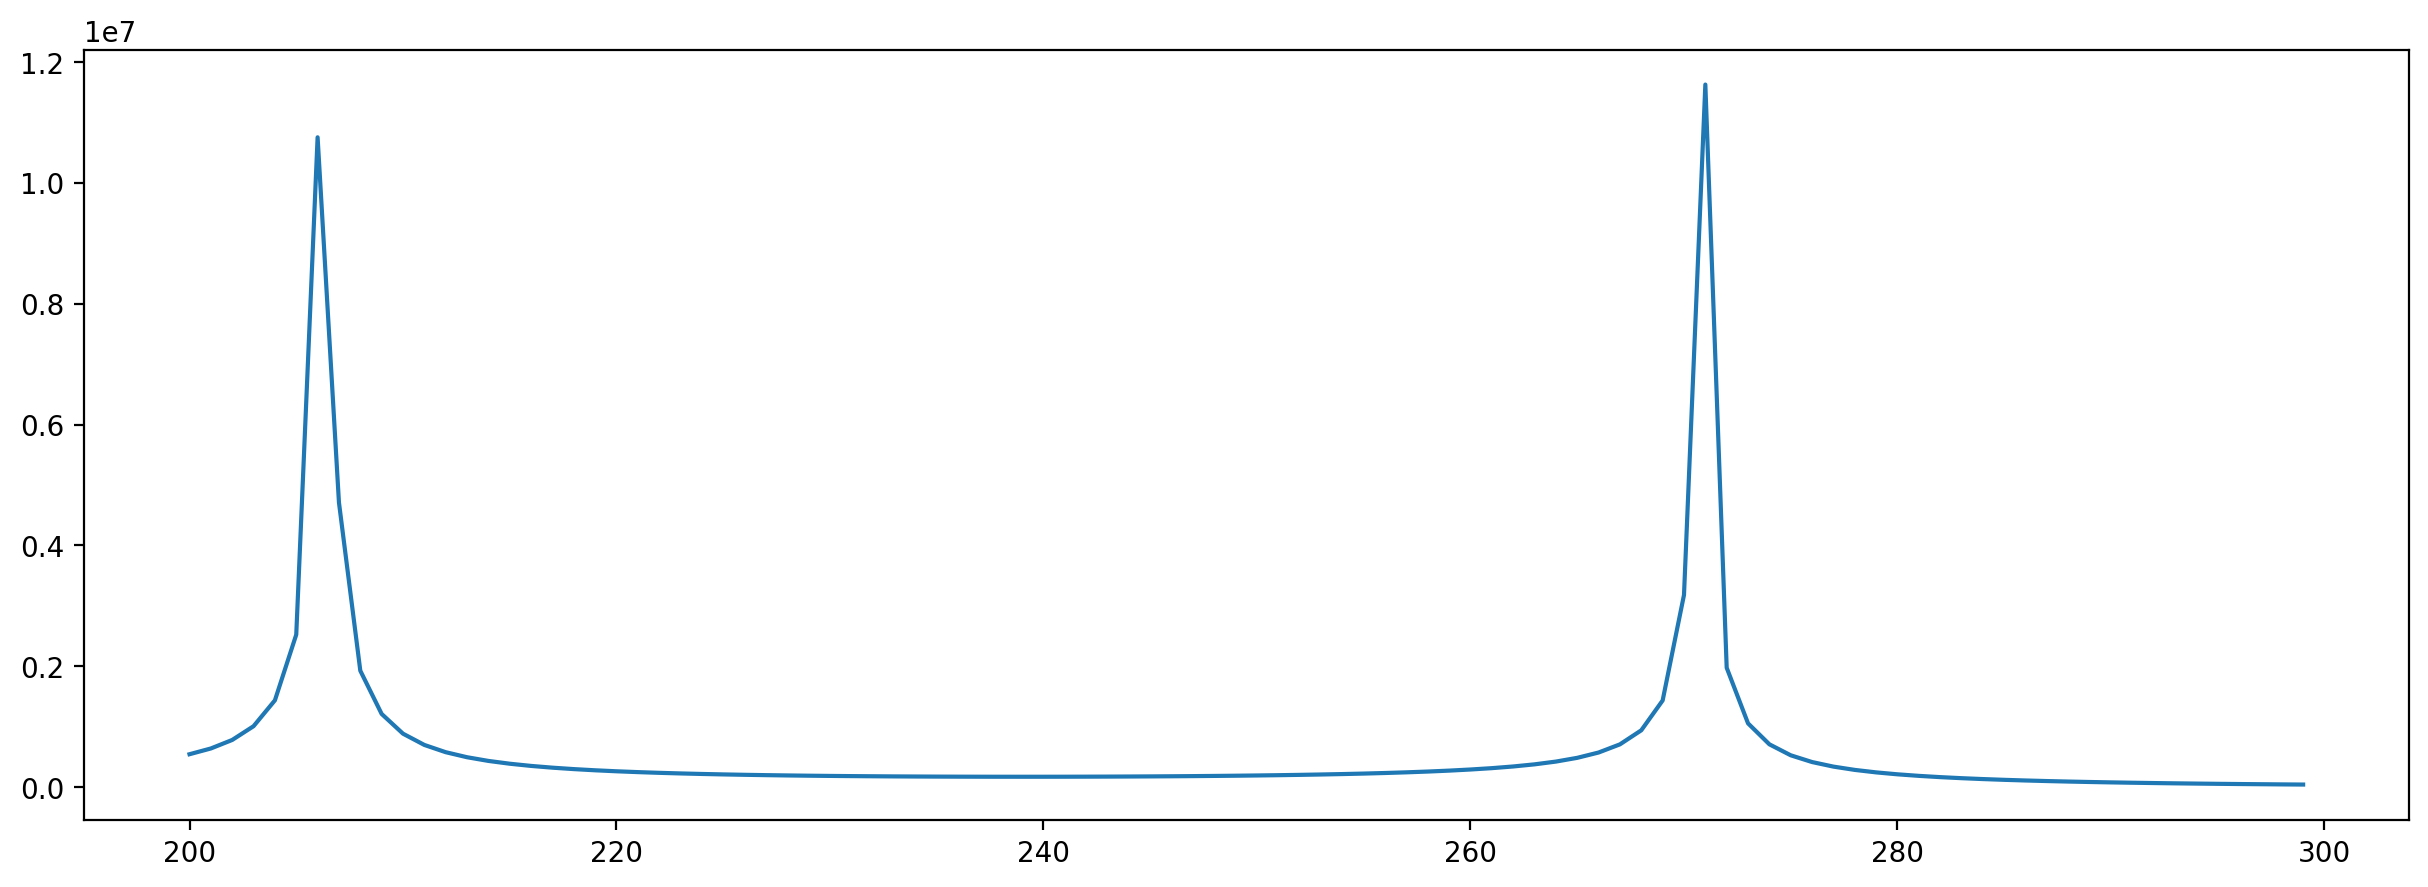

In [134]:
rate, data = wavfile.read('audio_file_A_26408355.wav')
frequency_indices = np.arange(200, 300)
power = np.zeros(300-200)
for i in range(200, 300):
    power[i-200] = fk(i, data[:5000])

plt.plot(frequency_indices, np.sqrt(power))
plt.show()

Now plot the same results as function of frequency in units of Hertz. What was the frequency of the wave have
that you saw in the previous plot?

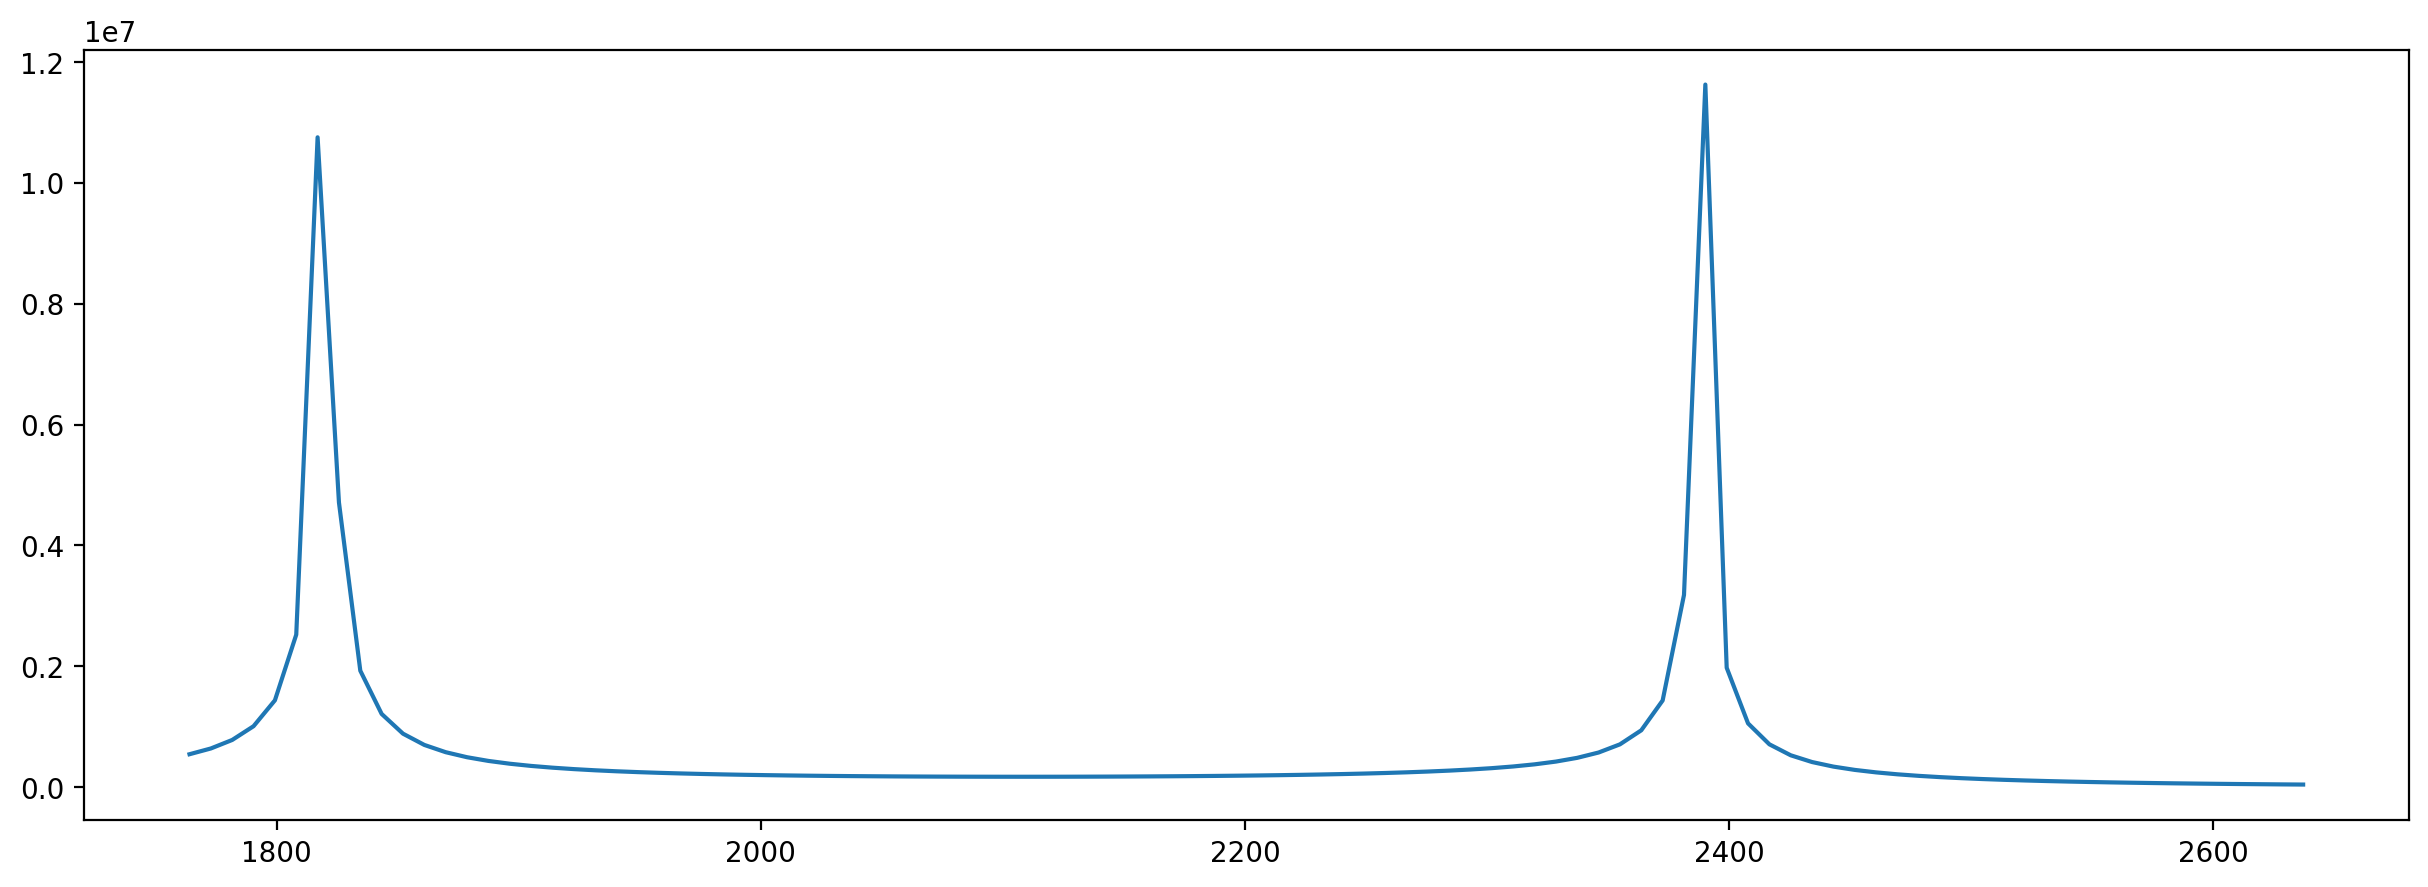

In [135]:
frequency_indices = np.arange(200, 300) * rate / len(data[:5000])
plt.plot(frequency_indices, np.sqrt(power))
plt.show()

Finally we want to speed this calculations by using use fast Fourier transform (FFT) routines that are provided
in the NumyPy library. Cut and paste the following lines and analyze what happens.

[35028577.           +0.j           195973.16891859-1043.30589714j
   196103.27486358-2104.3941338j  ...   196159.90293318+3182.02652165j
   196103.27486358+2104.3941338j    195973.16891859+1043.30589714j]
(5000,)


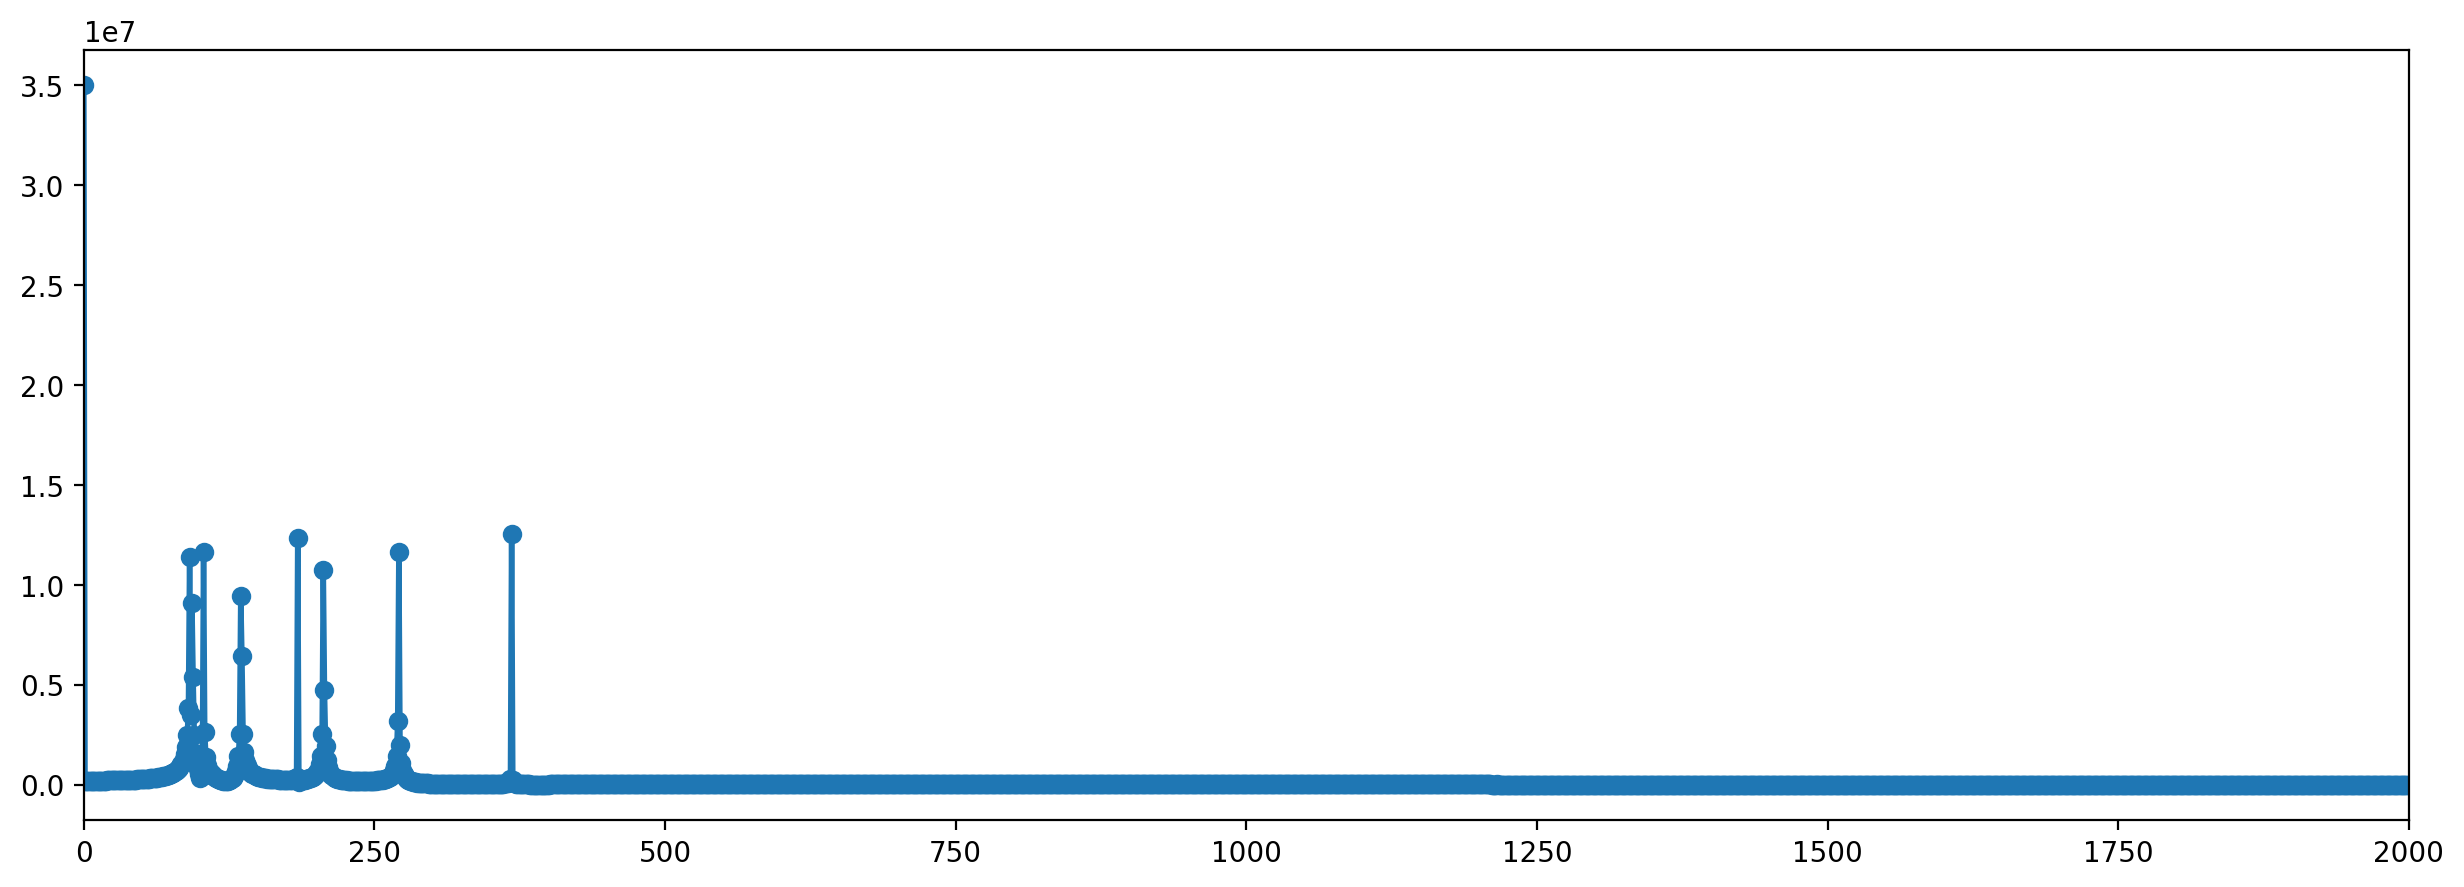

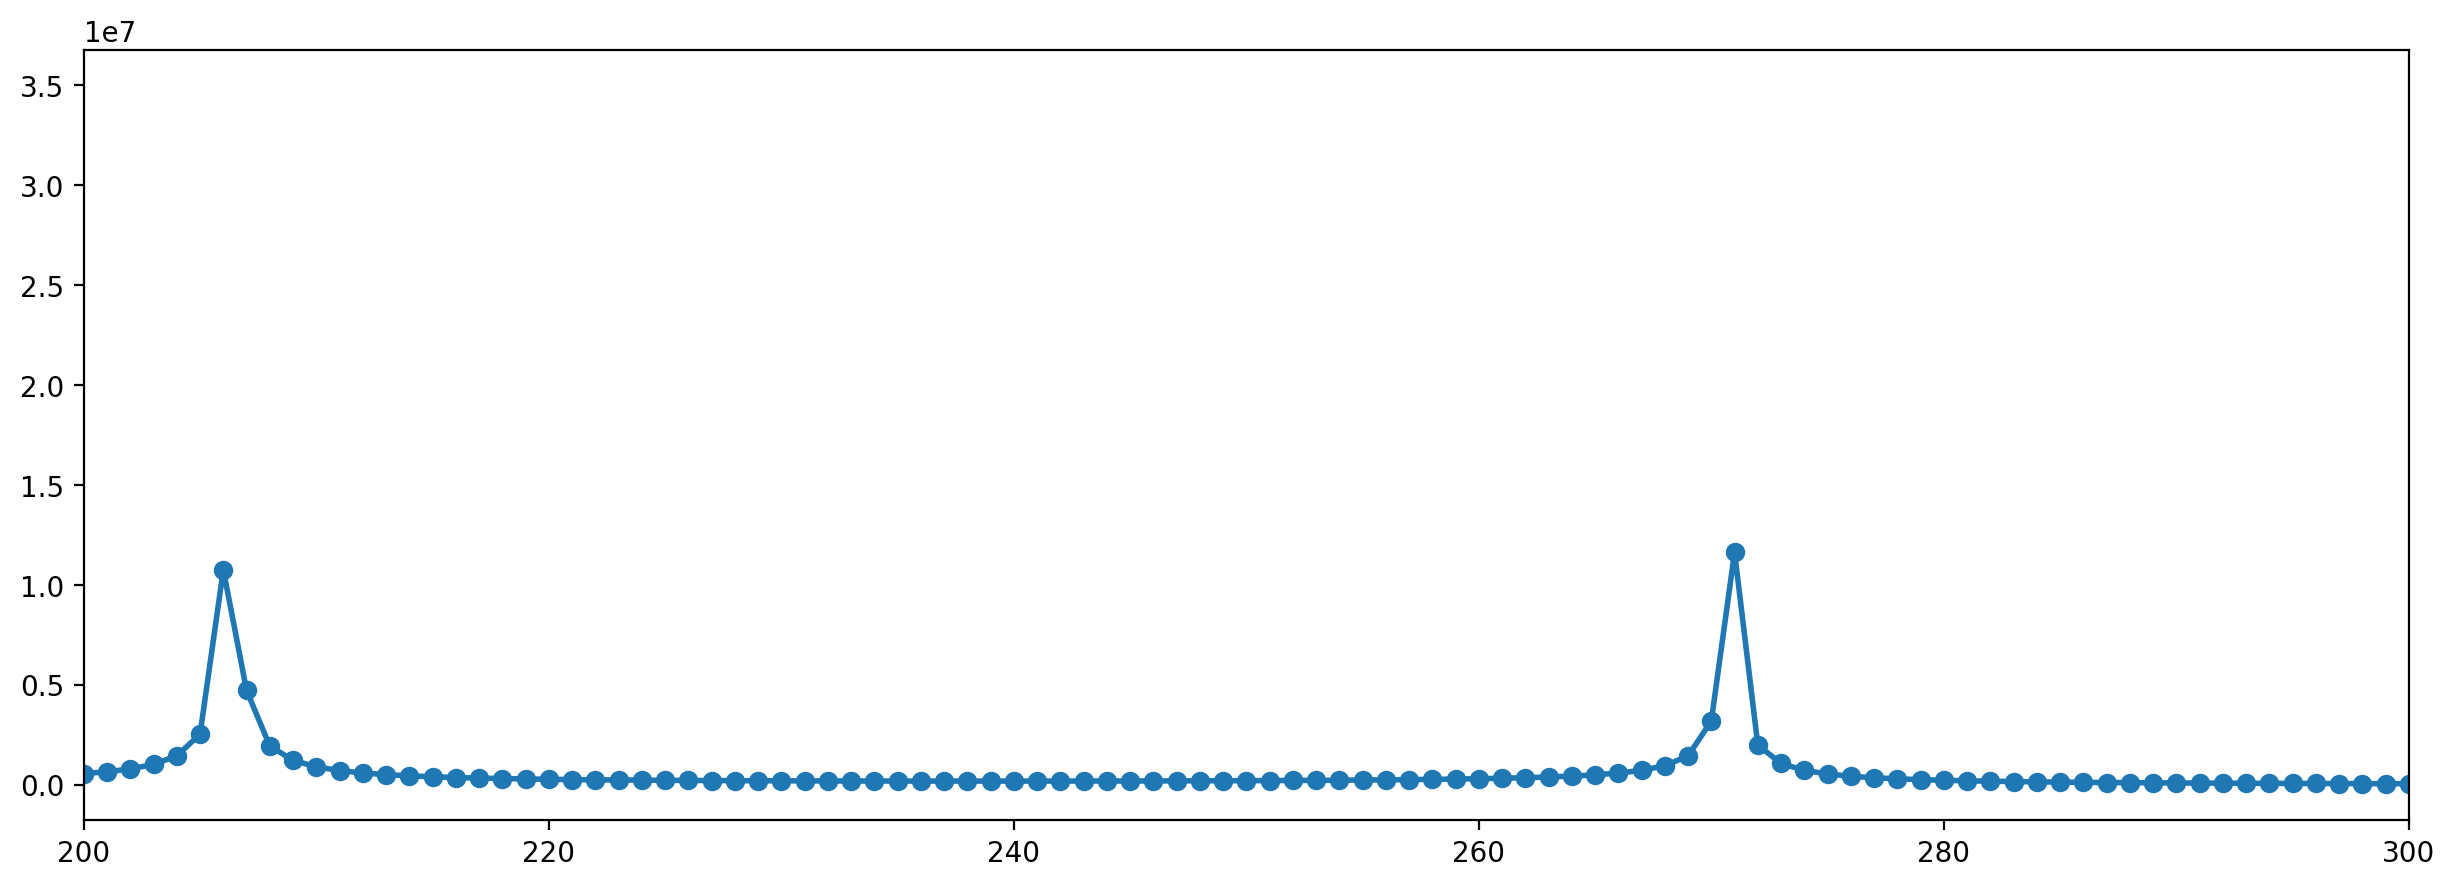

In [136]:
#For FFT, see https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html
ft = np.fft.fft(data[:5000])
print(ft)
print(ft.shape)
plt.xlim(0,2000)
plt.plot(abs(ft),'o-',lw=2)
plt.show()
plt.xlim(200,300)
plt.plot(abs(ft),'o-',lw=2)
plt.show()

Combined lab and homework assignment on sound and audio files: Part 3, a
hearing test and three notes

Execute the following commands to play tune A with frequency 440 Hz

In [137]:
import numpy as np
from IPython.display import Audio
frequency = 440 # Play a tune A with a frequeny of 440 Hz
fs = 44100 # 44100 samples per second
seconds = 2 # Duration of 2 seconds
# Generate array with seconds * sample_rate steps
t = np.linspace(0, seconds, seconds * fs, False)
# Generate a sine wave
note = np.sin(frequency * t * 2 * np.pi)
# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max( np.abs(note) )
# Convert to 16-bit data
audio = audio.astype(np.int16)
# Start playback
Audio(audio, rate=fs)

Increase and decrease the frequency until you can no longer hear anything (except for the very beginning and
end). IOn the following notebook cell, simply write "I determined my hearing range." If you wish you are
welcome to report both limits. This is entirely voluntary, however. We may report discuss your collective
responses without mentioning names.

In [138]:
#The highest frequency I can hear:
frequency = 17000 #(Hz)
fs = 44100
seconds = 2
t = np.linspace(0, seconds, seconds * fs, False)
note = np.sin(frequency * t * 2 * np.pi)
audio = note * (2**15 - 1) / np.max( np.abs(note) )
audio = audio.astype(np.int16)
Audio(audio, rate=fs)

In [139]:
#The lowest frequency I can hear:
frequency = 50 #(Hz)
fs = 44100
seconds = 2
t = np.linspace(0, seconds, seconds * fs, False)
note = np.sin(frequency * t * 2 * np.pi)
audio = note * (2**15 - 1) / np.max( np.abs(note) )
audio = audio.astype(np.int16)
Audio(audio, rate=fs)

Modify the code above to consecutively play three notes of your choice from
https://www.seventhstring.com/resources/notefrequencies.html Here is a example how you can calculate the
frequencies rather extracting them from table. Specify the names of your notes.

In [140]:
#Minor triad
C = 261.6
E_flat = 311.1
G = 392.0

import numpy as np
from IPython.display import Audio

# Define the parameters for each note
note1_freq = C # Frequency of note 1 in Hz
note1_duration = 2.0  # Duration of note 1 in seconds

note2_freq = E_flat  # Frequency of note 2 in Hz
note2_duration = 1.5  # Duration of note 2 in seconds

note3_freq = G  # Frequency of note 3 in Hz
note3_duration = 1.0  # Duration of note 3 in seconds

# Sampling rate (in Hz)
sample_rate = 44100

# Generate the time axis for each note
note1_time = np.linspace(0, note1_duration, int(note1_duration * sample_rate), endpoint=False)
note2_time = np.linspace(0, note2_duration, int(note2_duration * sample_rate), endpoint=False)
note3_time = np.linspace(0, note3_duration, int(note3_duration * sample_rate), endpoint=False)

# Generate the waveforms for each note
note1_waveform = np.sin(2 * np.pi * note1_freq * note1_time)
note2_waveform = np.sin(2 * np.pi * note2_freq * note2_time)
note3_waveform = np.sin(2 * np.pi * note3_freq * note3_time)

# Concatenate the waveforms to create the final sound
sound_array = np.concatenate((note1_waveform, note2_waveform, note3_waveform))

# Display and play the sound using IPython's Audio function
Audio(sound_array, rate=sample_rate)


Combined lab and homework assignment on sound and audio files: Part 4,
manipulate Mussorgsky's Promenade

Download the file 'Promenadeveryshort_mono.wav' and execute the following commands.

In [141]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
from scipy.io import wavfile

In [142]:
def PrintArrayInfo(a,name=''):
    if (len(name)==0):
        print("Array info:")
    else:
        print("Array:", name)
        print("shape:", a.shape)
        print("dtype:", a.dtype)
        print("min, max:", a.min(), a.max())
        print()

In [143]:
def Rescale(data):
    data2 = np.copy(data)
    dMin = data2.min()
    dMax = data2.max()
    dataRange = dMax-dMin # warning: if you call this 'range', for loops will stop working
    data2 = (2**15-1) * ( 2.0*(data2-dMin) / dataRange -1.0 )
    data2 = data2.astype(np.int16)
    return data2

In [144]:
rate, data = wavfile.read('Promenade_very_short_mono.wav')
Audio(data, rate = rate)

Plot the wave amplitudes as we have done in part 2. How long is the file in seconds?

A: It has almost 394862/44100 = 8.95 seconds

Data rate [units of Hz = 1/seconds] =  44100
Array: data
shape: (394864,)
dtype: int16
min, max: -10087 10795



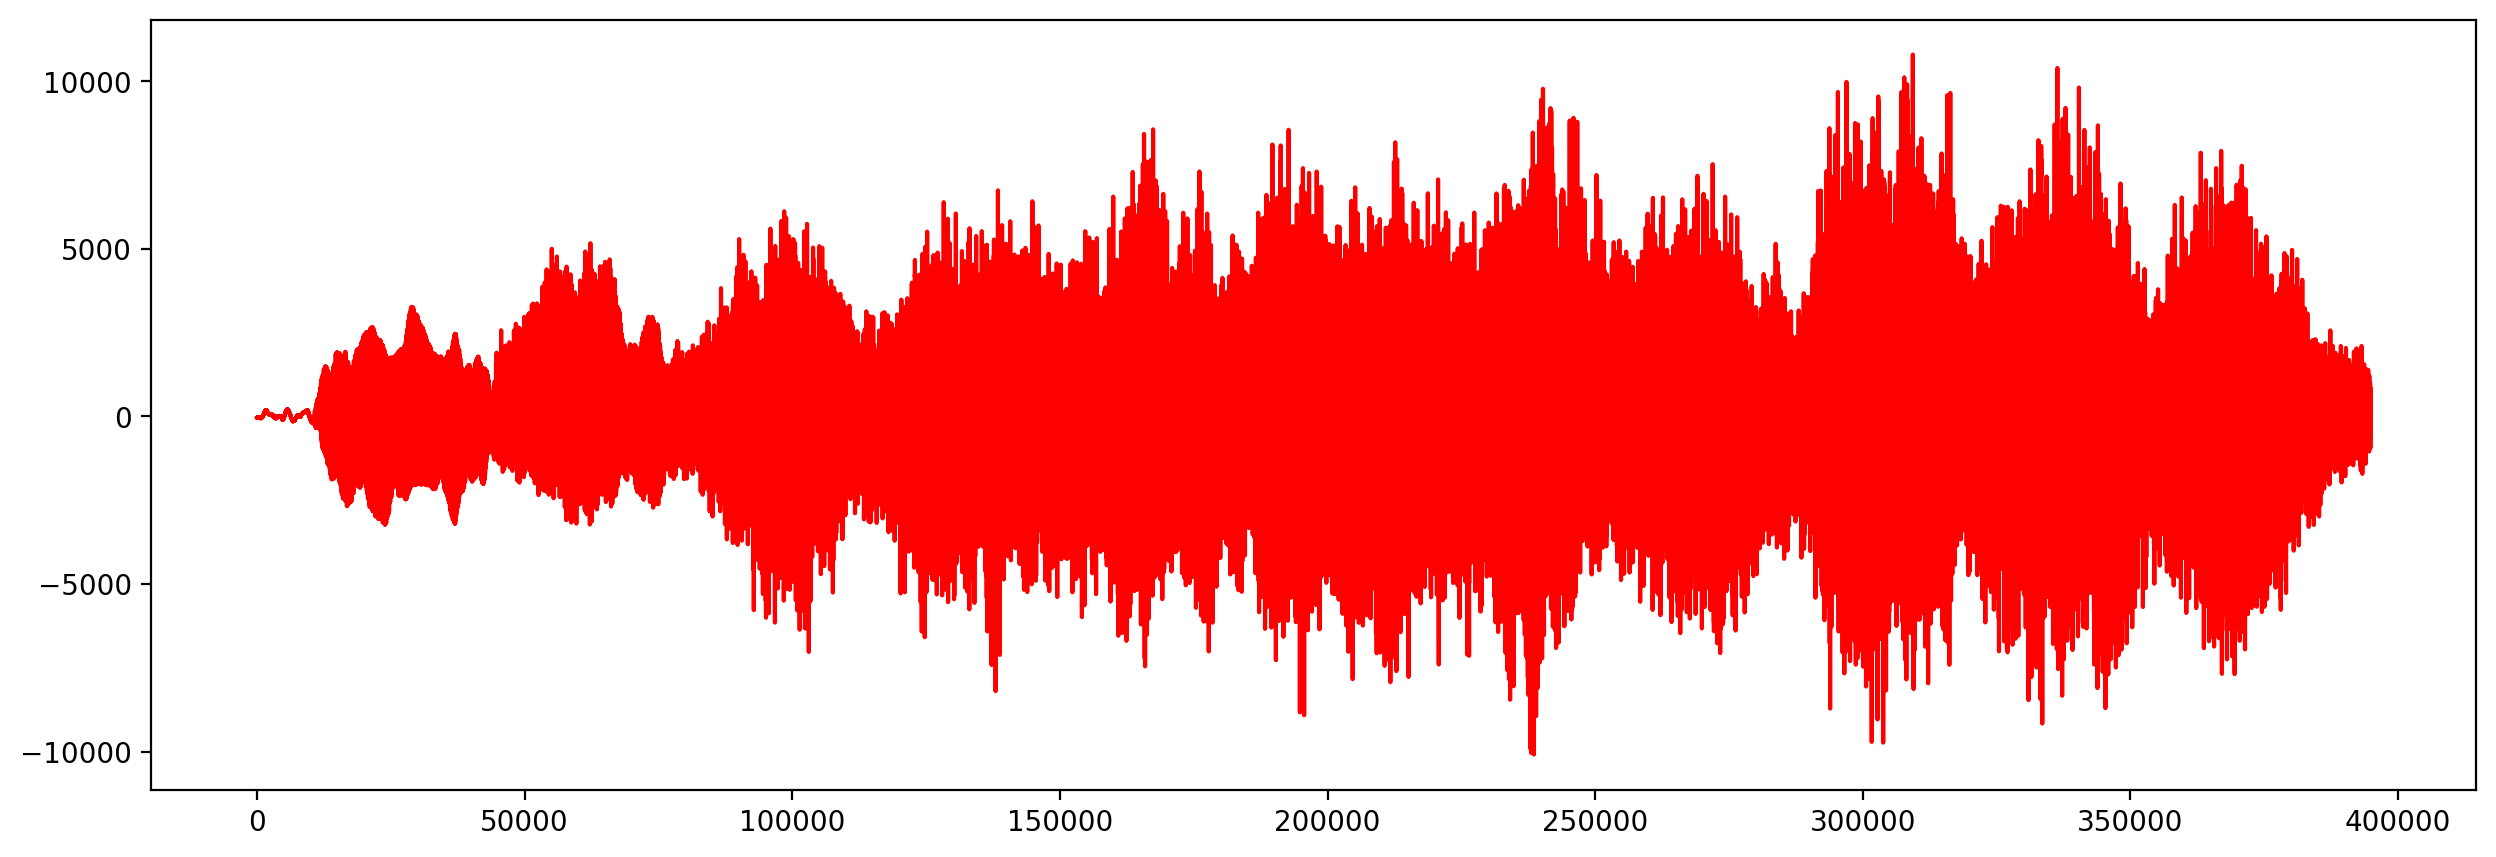

In [145]:
print("Data rate [units of Hz = 1/seconds] = ",rate)
PrintArrayInfo(data,"data")
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data,'r-')
plt.show()

Cut the data short so that only the first 5 notes are being played. This is about 4.1 seconds.

In [146]:
data_cut = data[:180000]
Audio(data_cut, rate = rate)

Fourier transform the audio data with "ft = np.fft.fft(data)" and plot the resulting frequencies spectrum in units of
Hertz even though you might find it challenging to work in real units. Pick a reasonable upper frequency limit for
your plot.

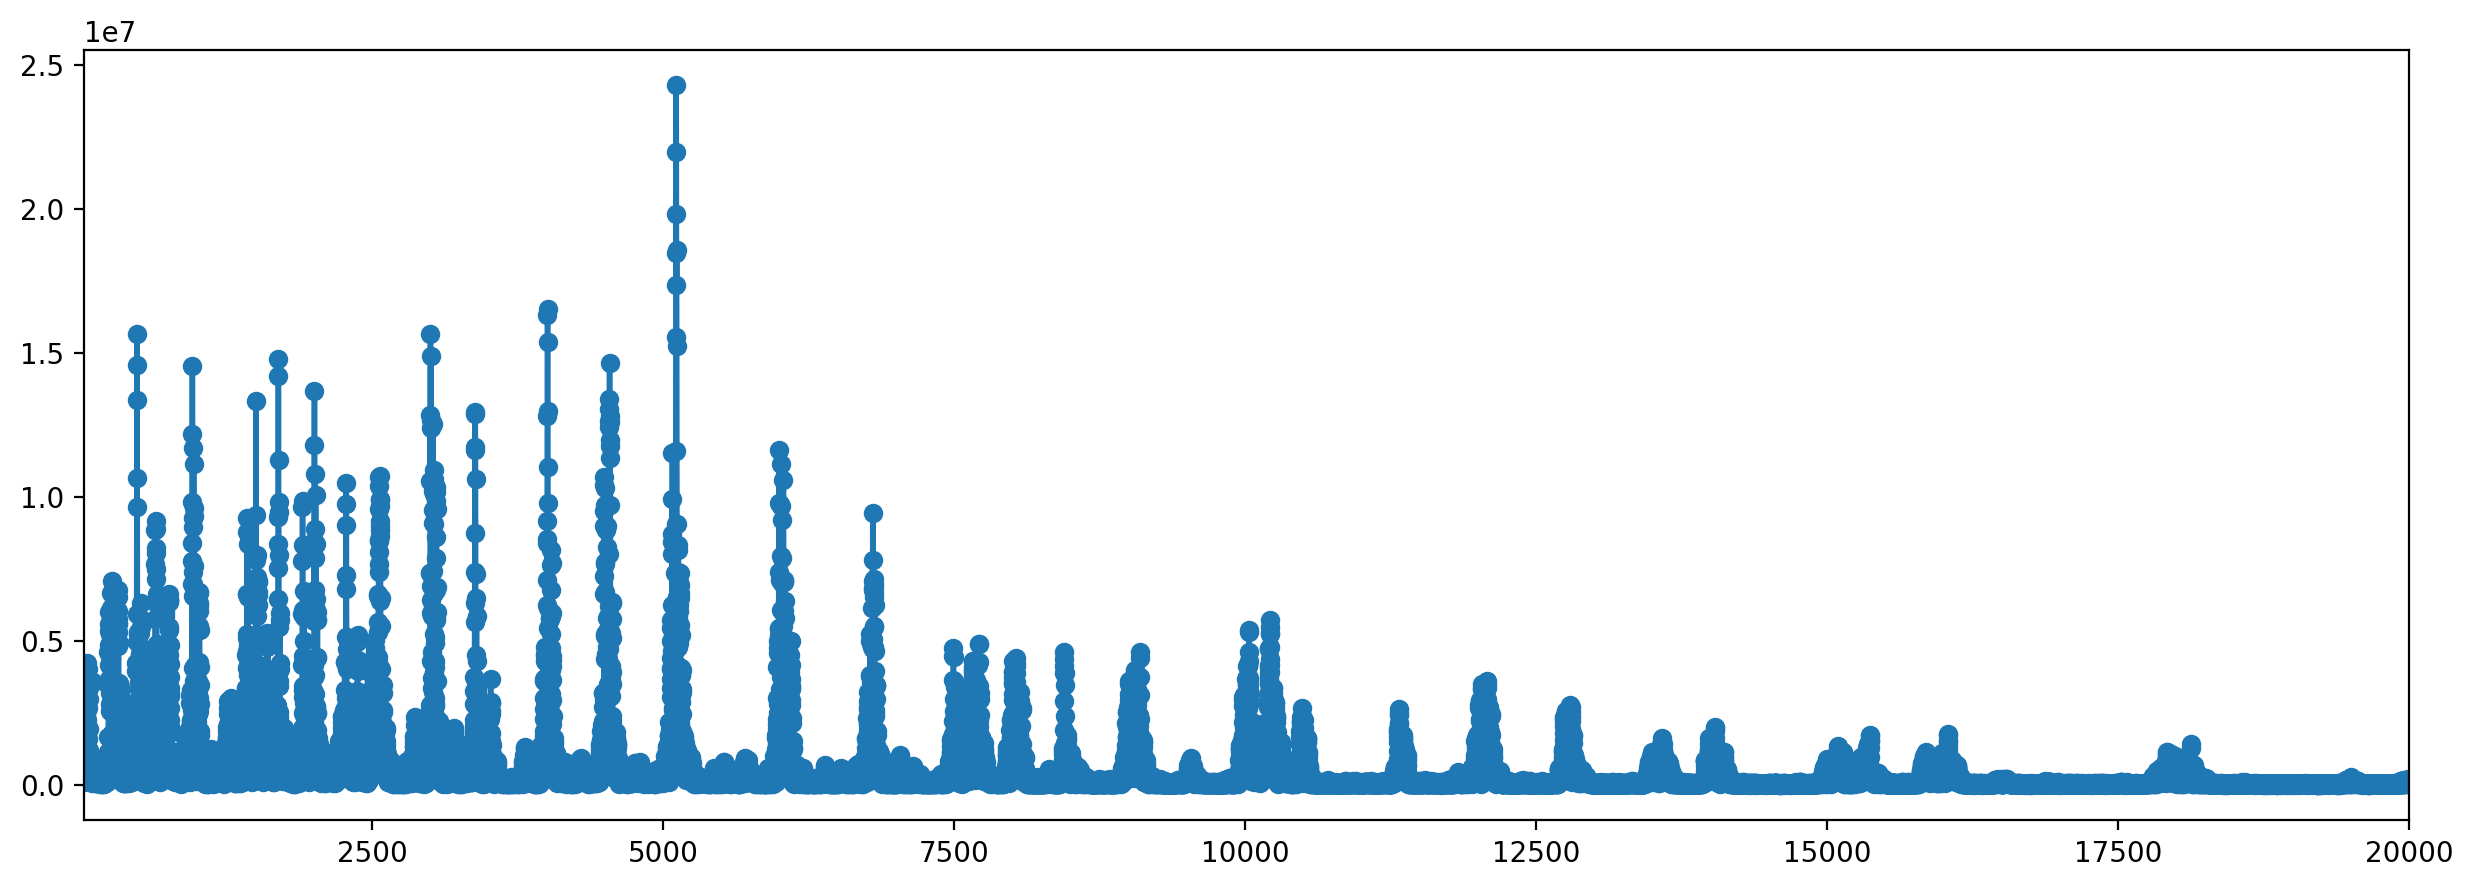

In [147]:
ft = np.fft.fft(data_cut)
plt.plot(abs(ft),'o-',lw=2)
plt.xlim(20,20000)  #plot out the people can hear limit
plt.show()

Now remove all frequencies below 1 kHz and above 3 kHz from the spectrum.

In [148]:
for i in range(len(ft)):
    if i < 1000 or i > 3000:
        ft[i] = 0


Fourier transform the reduced spectrum back into real time with "data2 = np.fft.ifft(ft2)" Then rescale and play
the "data2.real" using the functions above.

In [149]:
data2 = np.fft.ifft(ft)
data3 = Rescale(data2.real)
Audio(data3, rate = rate)

Fourier transfrom the original audio file once again. Then scale all frequencies by factor 2, transform it back to
real space and play it.

In [150]:
ft = np.fft.fft(data_cut)
ft = ft * 2
data2 = np.fft.ifft(ft)
data3 = Rescale(data2.real)
Audio(data3, rate = rate)

Fourier transfrom the original audio file once again but this time, scale all frequencies by factor 0.25, transform
it back to real space and play it.

In [151]:
ft = np.fft.fft(data_cut)
ft = ft * 0.25
data2 = np.fft.ifft(ft)
data3 = Rescale(data2.real)
Audio(data3, rate = rate)